In [50]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [51]:
crime = pd.read_csv('./data/서울시 5대범죄 발생현황.txt', sep='\t', header=1, thousands=',')
crime.head()

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [52]:
crime.drop([0],inplace =True)
del crime['기간']
crime.rename({
    '발생.1':'살인발생','검거.1':'살인검거',
    '발생.2':'강도발생','검거.2':'강도검거',
    '발생.3':'강간발생','검거.3':'강간검거',
    '발생.4':'절도발생','검거.4':'절도검거',
    '발생.5':'폭력발생','검거.5':'폭력검거'}, inplace =True,axis=1)
crime.head()

,자치구,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [53]:
crime.dtypes

자치구     object
발생       int64
검거       int64
살인발생     int64
살인검거     int64
강도발생     int64
강도검거     int64
강간발생     int64
강간검거     int64
절도발생     int64
절도검거     int64
폭력발생     int64
폭력검거     int64
dtype: object

In [54]:
crime.describe()

,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4146.720000,2992.200000,5.440000,5.120000,5.440000,5.320000,258.760000,240.280000,1688.160000,851.360000,2188.920000,1890.120000
std,1182.421651,805.356339,2.973214,2.905741,3.536477,3.325658,147.451484,221.590749,547.886901,239.641726,565.850239,480.402897
min,2110.000000,1497.000000,1.000000,1.000000,1.000000,1.000000,90.000000,83.000000,790.000000,394.000000,1224.000000,1014.000000
25%,3313.000000,2343.000000,3.000000,3.000000,3.000000,3.000000,175.000000,126.000000,1229.000000,634.000000,1816.000000,1585.000000
50%,4011.000000,2964.000000,5.000000,5.000000,5.000000,5.000000,195.000000,158.000000,1565.000000,908.000000,2117.000000,1857.000000
75%,4842.000000,3543.000000,6.000000,6.000000,7.000000,6.000000,273.000000,239.000000,2190.000000,1050.000000,2552.000000,2196.000000
max,7304.000000,5069.000000,13.000000,10.000000,15.000000,14.000000,666.000000,1143.000000,2970.000000,1339.000000,3658.000000,3159.000000


In [55]:
#검거율 구하기
crime['살인검거율'] = crime['살인검거'] / crime['살인발생'] *100
crime['강도검거율'] = crime['강도검거'] / crime['강도발생'] *100
crime['강간검거율'] = crime['강간검거'] / crime['강간발생'] *100
crime['절도검거율'] = crime['절도검거'] / crime['절도발생'] *100
crime['폭력검거율'] = crime['폭력검거'] / crime['폭력발생'] *100
crime.head()

,자치구,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892,125.000000,114.285714,480.252101,70.561056,90.874159
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633,50.000000,83.333333,58.974359,47.683924,84.963580
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823,100.000000,133.333333,87.132353,54.454454,89.538310
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216,83.333333,111.111111,72.180451,52.680412,87.230990
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585,125.000000,83.333333,78.021978,53.760000,85.536967


In [56]:
del crime['살인검거']
del crime['강도검거']
del crime['강간검거']
del crime['절도검거']
del crime['폭력검거']
del crime['발생']
del crime['검거']
crime.head()

,자치구,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
1,종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
2,중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
3,용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
4,성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
5,광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [57]:
crime.set_index('자치구', inplace=True)
crime.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [60]:
#정규화하기
from sklearn import preprocessing
col = ['살인발생','강도발생','강간발생','절도발생','폭력발생']
x =crime[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_norm = pd.DataFrame(x_scaled,columns=col, index=crime.index)


col2 = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
crime_norm[col2]=crime[col2]
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967


In [61]:
col=['살인발생','강도발생','강간발생','절도발생','폭력발생']
crime_norm['범죄'] = np.sum(crime_norm[col], axis=1)
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄
자치구,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,1.620591
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,1.557245
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,1.054975
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990,1.215161
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,1.680980


In [63]:
col = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
l = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
crime_norm['검거'] = np.sum(crime_norm[col], axis=1)
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거
자치구,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,1.620591,880.973031
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,1.557245,324.955196
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,1.054975,464.458451
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990,1.215161,406.536298
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,1.680980,425.652278


In [72]:
result_cctv = pd.read_csv('./data/result_cctv.csv', encoding='utf8',index_col='구별' )
result_cctv.head()

,소계,최근증가율,인구수,내국인,외국인,세대당인구,65세이상고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,2.30,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,2.35,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,2.13,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,2.19,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,1.81,78206,3.105790,15.198764,0.774456,1428.441743


In [71]:
crime_norm[['인구수','외국인수','cctv']] = result_cctv[['인구수','외국인','소계']]
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거,인구수,외국인수,cctv
자치구,,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,1.620591,880.973031,159842,9890,1471
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,1.557245,324.955196,135321,9521,1544
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,1.054975,464.458451,244953,15167,2063
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990,1.215161,406.536298,302695,7104,2679
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,1.680980,425.652278,361923,13859,1581


In [73]:
#시각화 하기

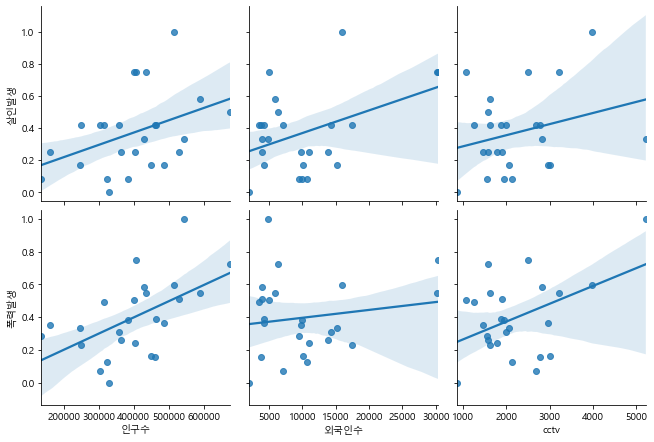

In [80]:
sns.pairplot(crime_norm, x_vars=['인구수','외국인수','cctv'],y_vars=['살인발생','폭력발생'],kind='reg',size=3)
plt.show()

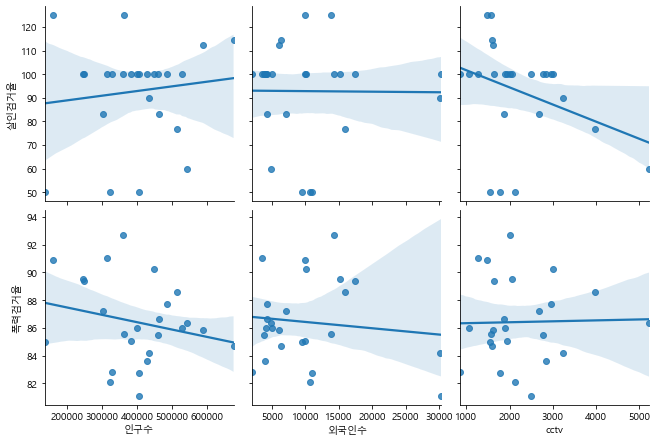

In [81]:
sns.pairplot(
    crime_norm,
    x_vars=['인구수','외국인수','cctv'],
    y_vars=['살인검거율','폭력검거율'],kind='reg',size=3)
plt.show()